In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename1 = "Data/XML/xml_dataset_char1.npz"
filename2 = "Data/XML/xml_dataset_char2.npz"
filename3 = "Data/XML/xml_dataset_char3.npz"

# Load numpy array
dataset1 = np.load(filename1)
dataset2 = np.load(filename2)
dataset3 = np.load(filename3)

x_dataset_full = np.concatenate((dataset1['x'], dataset2['x'], dataset3['x']))
y_dataset_full = np.concatenate((dataset1['y'], dataset2['y'], dataset3['y']))

print(x_dataset_full.shape, y_dataset_full.shape)

x_test = x_dataset_full[1520:1900]
y_test = y_dataset_full[1520:1900]

x_dataset = x_dataset_full[:1520]
y_dataset = y_dataset_full[:1520]

x_val = x_dataset[1216:]
y_val = y_dataset[1216:]

x_train = x_dataset[:1216]
y_train = y_dataset[:1216]

# Assign and reshape data
x_train, y_train = x_train.reshape(1216, 4096, 256), y_train.reshape(1216, 4096, 256)
x_val, y_val = x_val.reshape(304, 4096, 256), y_val.reshape(304, 4096, 256)
x_test, y_test = x_test.reshape(380, 4096, 256), y_test.reshape(380, 4096, 256)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1989, 4096, 256) (1989, 4096, 256)
Training shape:  (1216, 4096, 256) (1216, 4096, 256)
Validation shape:  (304, 4096, 256) (304, 4096, 256)
Test shape:  (380, 4096, 256) (380, 4096, 256)


In [3]:
# Base model
model = Sequential()
model.add(LSTM(256, input_shape=(4096, 256), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=38,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4096, 256)         525312    
Total params: 525,312
Trainable params: 525,312
Non-trainable params: 0
_________________________________________________________________
Train on 1216 samples, validate on 304 samples
Epoch 1/200
1216/1216 [==============================] - 230s 189ms/step - loss: 0.0013 - acc: 0.0279 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 2/200
1216/1216 [==============================] - 225s 185ms/step - loss: 0.0012 - acc: 0.0210 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 3/200
1216/1216 [==============================] - 224s 184ms/step - loss: 0.0012 - acc: 0.0066 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 4/200
1216/1216 [==============================] - 225s 185ms/step - loss: 0.0012 - acc: 9.6371e-06 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 5/200
1216/1216 [==================

Epoch 52/200
1216/1216 [==============================] - 214s 176ms/step - loss: 4.1486e-04 - acc: 1.8070e-06 - val_loss: 8.0595e-04 - val_acc: 1.1243e-04
Epoch 53/200
1216/1216 [==============================] - 216s 178ms/step - loss: 4.0619e-04 - acc: 1.4717e-04 - val_loss: 7.7690e-04 - val_acc: 1.1243e-04
Epoch 54/200
1216/1216 [==============================] - 216s 178ms/step - loss: 3.9744e-04 - acc: 8.6333e-06 - val_loss: 7.4865e-04 - val_acc: 2.2487e-04
Epoch 55/200
1216/1216 [==============================] - 216s 178ms/step - loss: 3.8898e-04 - acc: 2.4294e-05 - val_loss: 7.2104e-04 - val_acc: 1.1243e-04
Epoch 56/200
1216/1216 [==============================] - 215s 176ms/step - loss: 3.8046e-04 - acc: 1.4054e-06 - val_loss: 6.9414e-04 - val_acc: 2.2487e-04
Epoch 57/200
1216/1216 [==============================] - 216s 178ms/step - loss: 3.7253e-04 - acc: 1.4054e-06 - val_loss: 6.6794e-04 - val_acc: 2.2487e-04
Epoch 58/200
1216/1216 [==============================] - 226s 1

1216/1216 [==============================] - 218s 179ms/step - loss: 2.2858e-04 - acc: 1.6062e-06 - val_loss: 1.7531e-04 - val_acc: 4.4973e-04
Epoch 105/200
1216/1216 [==============================] - 219s 180ms/step - loss: 2.2990e-04 - acc: 4.0155e-07 - val_loss: 1.7651e-04 - val_acc: 0.0000e+00
Epoch 106/200
1216/1216 [==============================] - 220s 181ms/step - loss: 2.2842e-04 - acc: 0.0620 - val_loss: 1.7420e-04 - val_acc: 0.0000e+00
Epoch 107/200
1216/1216 [==============================] - 219s 180ms/step - loss: 2.2824e-04 - acc: 0.0102 - val_loss: 1.7417e-04 - val_acc: 0.0057
Epoch 108/200
1216/1216 [==============================] - 218s 179ms/step - loss: 2.2778e-04 - acc: 7.3282e-05 - val_loss: 1.7288e-04 - val_acc: 0.0000e+00
Epoch 109/200
1216/1216 [==============================] - 221s 181ms/step - loss: 2.2708e-04 - acc: 9.2958e-04 - val_loss: 1.7229e-04 - val_acc: 0.0013
Epoch 110/200
1216/1216 [==============================] - 220s 181ms/step - loss: 2.261

1216/1216 [==============================] - 218s 179ms/step - loss: 2.2311e-04 - acc: 2.0077e-07 - val_loss: 1.6133e-04 - val_acc: 0.0000e+00
Epoch 157/200
1216/1216 [==============================] - 224s 184ms/step - loss: 2.2268e-04 - acc: 2.0077e-07 - val_loss: 1.6008e-04 - val_acc: 0.0000e+00
Epoch 158/200
1216/1216 [==============================] - 223s 184ms/step - loss: 2.2241e-04 - acc: 8.0309e-07 - val_loss: 1.6044e-04 - val_acc: 0.0000e+00
Epoch 159/200
1216/1216 [==============================] - 223s 183ms/step - loss: 2.2261e-04 - acc: 0.0325 - val_loss: 1.6077e-04 - val_acc: 0.0000e+00
Epoch 160/200
1216/1216 [==============================] - 218s 180ms/step - loss: 2.2249e-04 - acc: 1.2046e-06 - val_loss: 1.6017e-04 - val_acc: 0.0000e+00
Epoch 161/200
1216/1216 [==============================] - 219s 180ms/step - loss: 2.2287e-04 - acc: 0.0000e+00 - val_loss: 1.6102e-04 - val_acc: 1.1243e-04
Epoch 162/200
1216/1216 [==============================] - 216s 178ms/step -

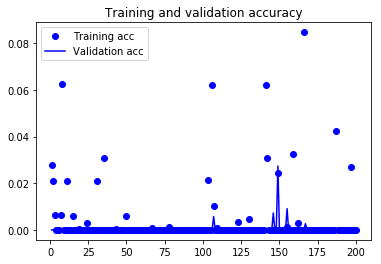

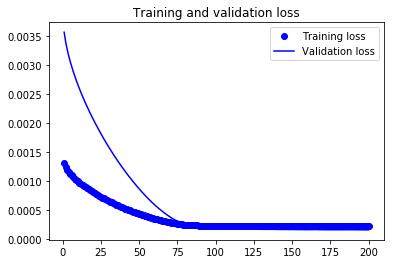

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

380/380 [==============================] - 21s 55ms/step
Test accuracy: 6.424753289473684e-07
Test loss: 0.00031693262525981194
